### Model Complexity and Evaluation



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Polynomial Models

Thus far, our regression models have taken the form:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_ix_i$$

where all our inputs to the model were linear.  


In this notebook, we consider models of the form:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + ... + \beta_ix_1^i$$

These are commonly referred to as *Polynomial Regression Models* -- however we are still using Linear Regression because the unknown quantities -- $\beta$ -- are linear.

In [3]:
#load in the cars data
cars = pd.read_csv('data/cars.csv')

In [4]:
cars.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [19]:
#x = mpg and y = hp
X = cars[['mpg']]
y = cars['hp']

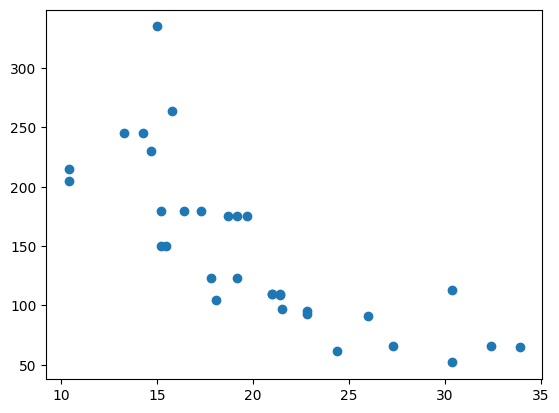

In [6]:
#scatter plot of x vs. y
plt.scatter(X, y)

### Reminder on Least Squares

$$f(m, b) = \sum_{i = 1}^n (y_i - (mx_i + b))^2$$

**Assumptions of the model**

- The relationship between features and target are linear in nature
- The features are independent of one another
- The errors are normally distributed
- The residuals have constant variance across all feature values

In [20]:
#fit model
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

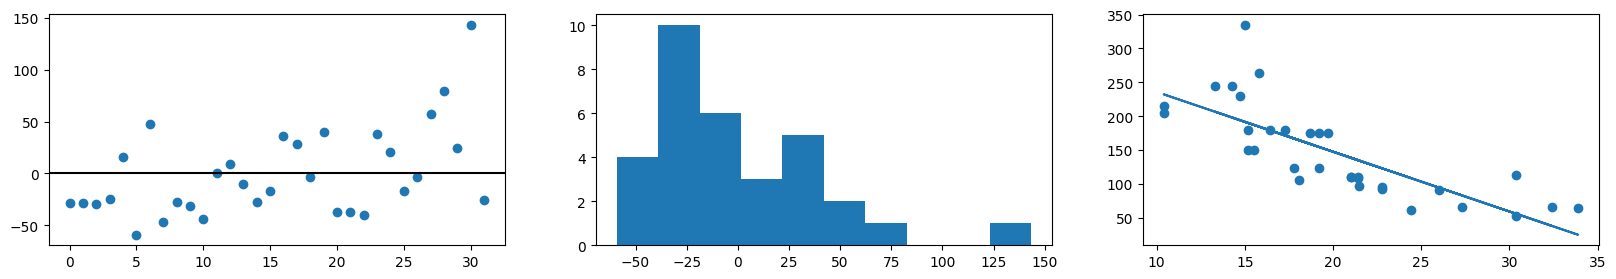

In [21]:
#plot residuals
resids = (y - preds)

fig, ax = plt.subplots(1, 3, figsize = (20, 3))

ax[0].plot(resids, 'o')
ax[0].axhline(color = 'black')
ax[1].hist(resids)
ax[2].scatter(X['mpg'], y)
ax[2].plot(X['mpg'], lr.predict(X))

In [22]:
#Any assumptions violated?  Why?
mean_squared_error(y, lr.predict(X))

1810.4863703431888

### Reminder: Quadratics

$$f(x) = ax^2 + bx + c$$


$$f(a, b, c) = \sum_{i = 1}^n (y_i - (ax_i^2 + bx_i + c))^2$$

In plain language, we add a new feature to represent the quadratic term and fit a linear regressor to these columns, essentially what we've done with multiple regression.

In [9]:
#examine X
X.head()

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


In [11]:
#add new feature
X["mpg_sq"] = pd.Series([i**2 for i in X["mpg"]])

/var/folders/xc/bw1zddcx3f58lp0vxlymm23h0000gn/T/ipykernel_8421/889914155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["mpg_sq"] = pd.Series([i**2 for i in X["mpg"]])


In [12]:
# check X again
X.head()

,mpg,mpg_sq
0,21.0,441.00
1,21.0,441.00
2,22.8,519.84
3,21.4,457.96
4,18.7,349.69


In [13]:
#fit model and look at coefficients
lr.fit(X, y)

LinearRegression()

In [15]:
# intercept
print(lr.coef_)
print(lr.intercept_)

[-23.34451763   0.33002884]
470.86947158376046


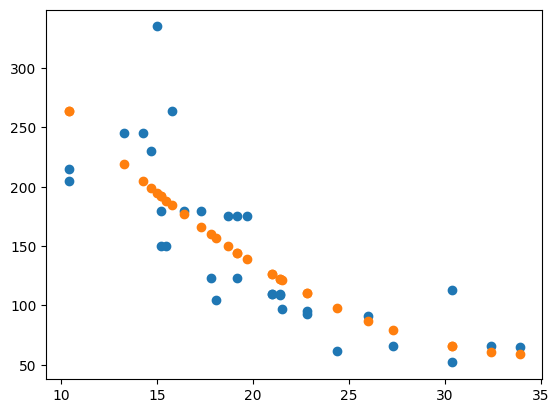

In [16]:
plt.scatter(X['mpg'], y)
plt.scatter(X['mpg'], lr.predict(X))

In [18]:
# mean squared error?
mean_squared_error(y, lr.predict(X))

1623.110284047419

**QUESTION**: Which is better -- the first or second degree model?

### Problem

1. Add a cubic term to the data.  
2. Fit a new model to the cubic data.
3. Determine the `mean_squared_error` of the linear, quadratic, and cubic models.  How do they compare?
4. Would a quartic polynomial (4th degree) be better or worse in terms of `mean_squared_error`?


### Experimenting with complexity

Below, a synthetic dataset is created and different complexity regression models can be controlled using the slider.  Which degree complexity seems best?  Consider the new data after you determine the ideal model.

In [23]:
from ipywidgets import interact
import ipywidgets as widgets

In [24]:
x = np.linspace(0, 12, 30)
y = 3*x + 15 + 4*np.sin(x) + np.random.normal(scale = 3.0, size = len(x))

In [25]:
# Don't Peek!
# x = np.random.choice(x, 50, replace = False)
def model_maker(n, newdata = False):
    coefs = np.polyfit(x, y, n)
    preds = np.polyval(coefs, x)
    x_,y_,p_ = zip(*sorted(zip(x, y, preds)))
    plt.scatter(x_, y_, label = 'Known Data')
    plt.xlim(0, 6)
    if newdata:
        np.random.seed(42)
        x2 = np.random.choice(np.linspace(0, 12, 1000), 35)
        y2 = 3*x2 + 15 + 4*np.sin(x2) + np.random.normal(scale = 3.0, size = len(x2))
        plt.scatter(x2, y2, label = 'New Data')
    plt.plot(x_, p_, color = 'red')
    plt.title(f'Degree {n}')
    plt.legend();

In [26]:
interact(model_maker, n = widgets.IntSlider(start = 1, min = 1, max = len(y), step = 1));

interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Checkbox(value=False, description='n…

In [ ]:
#CHOOSE OPTIMAL COMPLEXITY

`PolynomialFeatures`

Scikitlearn has a transformer that will do the work of adding polynomial terms on to our dataset.  For more information see the documentation [here](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#create a little dataset (3, 2)
toy_x = np.random.normal(size = (3, 2))
toy_x

In [ ]:
#instantiate and transform
poly_feats = PolynomialFeatures(include_bias = False)
poly_feats.fit_transform(toy_x)

`interaction_only = True`

In [ ]:
#look at the feature names
poly_feats.get_feature_names_out()

In [ ]:
#create a dataframe from results
pd.DataFrame(poly_feats.fit_transform(toy_x), columns = poly_feats.get_feature_names_out())

Now, let's use `PolynomialFeatures` to solve the earlier problem predicting `hp` using `mpg`. 

In [ ]:
#instantiate polynomial features


In [ ]:
#transform X
XT = ''

In [ ]:
#examine feature names


In [ ]:
#instantiate model


In [ ]:
#fit, predict and score


#### `train_test_split`



To this point, we have evaluated our models using the data they were built with.  If our goal is to use these models for future predictions, it would be better to understand the performance on data the model has *not* seen in the past.  To mimic this notion of unseen data, we create a small holdout set of data to use in evaluation.  

- **Train Data**: Data to build our model with.
- **Test Data**: Data to evaluate the model with (usually a smaller dataset than train)

Scikitlearn has a `train_test_split` function that will create these datasets for us.  Below we load it from the `model_selection` module and explore its functionality. [User Guide](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [27]:
# import function
from sklearn.model_selection import train_test_split

In [28]:
# create a train and test split
y = cars['hp']
X_train, X_test, y_train, y_test = train_test_split(XT, y)

NameError: name 'XT' is not defined

In [ ]:
# explore train data
X_train.shape

In [ ]:
# explore test data
X_test.shape

In [ ]:
# build model with train
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# evaluate train mse
train_preds = lr.predict(X_train) 
print(mean_squared_error(y_train, train_preds))

In [ ]:
# evaluate test mse
test_preds = lr.predict(X_test)
print(mean_squared_error(y_test, test_preds))

#### Using the test data to determine model complexity

Now, you can use the test set to measure the performance of models with varied complexity -- choosing the "best" based on the scores on the test data.

In [ ]:
# create polynomial features for train and test
for i in range(1, 10):
    poly_feats = PolynomialFeatures(degree = i, include_bias = False)
    X_train_poly = poly_feats.fit_transform(X_train)
    X_test_poly = poly_feats.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    train_preds = lr.predict(X_train_poly)
    test_preds = lr.predict(X_test_poly)
    print(f'Train MSE: {mean_squared_error(y_train, train_preds)}')
    print(f'Test MSE: {mean_squared_error(y_test, test_preds)}')
    print('--------------------------------')


In [ ]:
# fit the model


In [ ]:
# train MSE


In [ ]:
# test MSE


### Part II

#### Another Example

Returning to the credit dataset from earlier, we walk through a basic model building exercise.  Along the way we will explore the `OneHotEncoder` and `make_column_transformer` to help with preparing the data for modeling.  Our workflow is as follows:

- Convert categorical columns to dummy encoded
- Add polynomial features
- Build `LinearRegression` model on train data
- Evaluate on test data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [32]:
# load data
url = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa23/main/data/Credit.csv'

In [ ]:
# train/test split


In [ ]:
# import OneHotEncoder


In [ ]:
# instantiate


In [ ]:
# fit and transform train data


In [ ]:
# instead we specify columns with make_column_selector


In [ ]:
# transform train and test


In [ ]:
# add polynomial features


In [ ]:
# fit regression model


In [ ]:
# score on train


In [ ]:
# score on test


### A Larger Experiment

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
#sample data
X, y = make_regression(n_features = 4, n_samples = 1000, n_informative = 2)

In [ ]:
data = pd.DataFrame(X, columns = ['x1', 'x2', 'x3', 'x4'])
data['y'] = y

In [ ]:
data.head()

Now, we want to explore the effect of different complexities on the error of the model.  Your goal is to explore Linear Regression model complexities of degree 1 through 15 on a train and test set of data above.  

In [ ]:
#create train and test data


In [ ]:
#empty lists to hold train and test rmse


In [ ]:
#loop over 15 complexities

##instantiate polynomial transformer

##transform

##instantiate regressor

##fit

##append train and test rmse

#plot model complexity vs. rmse for both train and test
